In [1]:
!pip install graphviz

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))


1.0
0.9370629370629371


In [3]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train,y_train)
print(tree.score(X_train,y_train))
print(tree.score(X_test,y_test))

0.9882629107981221
0.951048951048951


In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성","양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

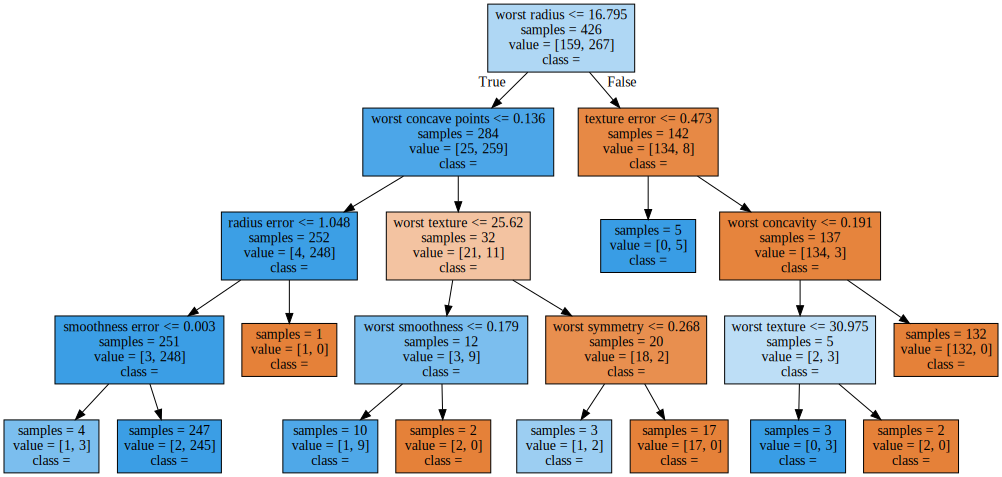

In [5]:
import graphviz

with open("tree.dot",encoding="UTF-8") as f:
    g = f.read()
display(graphviz.Source(g))

In [6]:
cancer.data.shape

(569, 30)

In [7]:
tree.feature_importances_.sum()

1.0

In [8]:
for n, f in zip(cancer.feature_names,tree.feature_importances_):
    print(n,f)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


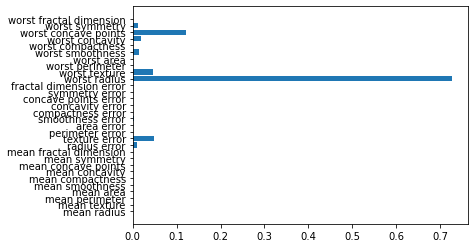

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#def plot_feature_importance_cancer(mdel):
n_feature = cancer.data.shape[1]
plt.barh(np.arange(n_feature), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.show()

In [10]:
cancer.data.shape

(569, 30)

Feature importances: [0. 1.]


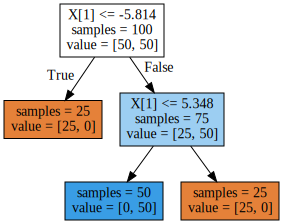

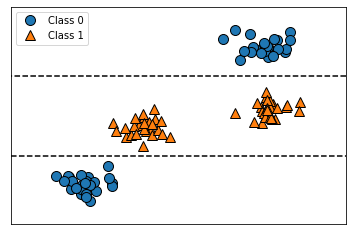

In [11]:
import mglearn
mglearn.plots.plot_tree_not_monotone()

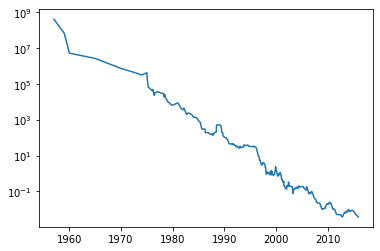

In [12]:
import pandas as pd
ram_prices = pd.read_csv('ram_price.csv')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.show()

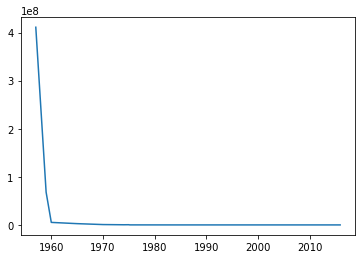

In [13]:
plt.plot(ram_prices.date, ram_prices.price)

In [31]:
from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]

In [36]:
X_train = data_train.date.to_numpy()
X_train

array([1957.  , 1959.  , 1960.  , 1965.  , 1970.  , 1973.  , 1974.  ,
       1975.  , 1975.08, 1975.25, 1975.75, 1976.  , 1976.17, 1976.42,
       1976.58, 1977.08, 1978.17, 1978.25, 1978.33, 1978.5 , 1978.58,
       1978.75, 1979.  , 1979.75, 1980.  , 1981.  , 1981.58, 1982.  ,
       1982.17, 1982.67, 1983.  , 1983.67, 1984.  , 1984.58, 1985.  ,
       1985.33, 1985.42, 1985.5 , 1985.58, 1985.67, 1985.83, 1985.92,
       1986.  , 1986.08, 1986.17, 1986.25, 1986.33, 1986.42, 1986.5 ,
       1986.58, 1986.67, 1986.75, 1986.92, 1987.  , 1987.08, 1987.17,
       1987.25, 1987.33, 1987.42, 1987.5 , 1987.58, 1987.67, 1987.75,
       1987.83, 1987.92, 1988.  , 1988.08, 1988.17, 1988.33, 1988.42,
       1988.5 , 1988.58, 1988.67, 1988.75, 1988.83, 1988.92, 1989.  ,
       1989.08, 1989.17, 1989.25, 1989.42, 1989.5 , 1989.58, 1989.67,
       1989.75, 1989.83, 1989.92, 1990.  , 1990.17, 1990.33, 1990.42,
       1990.5 , 1990.58, 1990.67, 1990.75, 1990.83, 1990.92, 1991.  ,
       1991.08, 1991

In [33]:
data_train.shape

(202, 3)

In [16]:
data_test.shape

(131, 3)

In [37]:
X_train = X_train[:, np.newaxis]

In [38]:
y_train = np.log(data_train.price)

In [39]:
X_train.shape

(202, 1)

In [40]:
from sklearn.linear_model import LinearRegression
dt = DecisionTreeRegressor().fit(X_train, y_train)

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [42]:
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

In [43]:
pred_dt = dt.predict(X_all)
pred_lr = lr.predict(X_all)

In [44]:
price_dt = np.exp(pred_dt)
price_lr = np.exp(pred_lr)

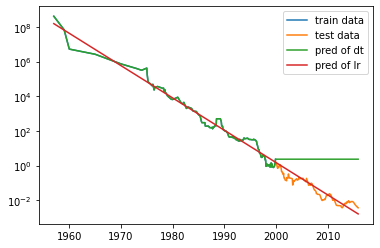

In [45]:
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_dt, label="pred of dt")
plt.semilogy(ram_prices.date, price_lr, label="pred of lr")
plt.legend()
plt.show()

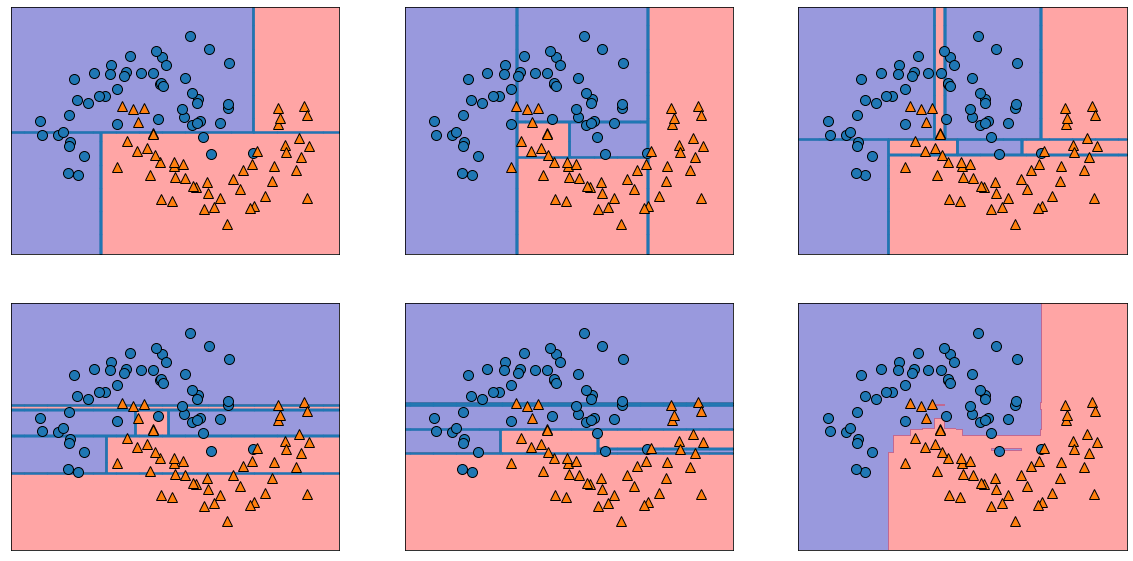

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train,y_train)
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate (zip(axes.ravel(), forest.estimators_)):
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X, fill=True, alpha=0.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

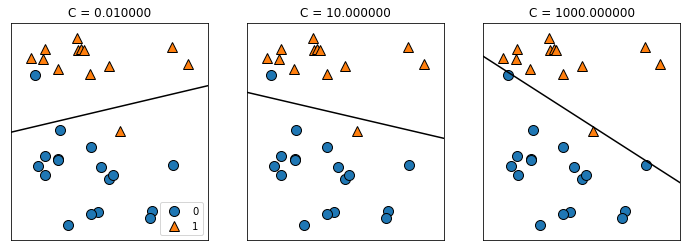

In [53]:
mglearn.plots.plot_linear_svc_regularization()

In [54]:
from sklearn.svm import SVC

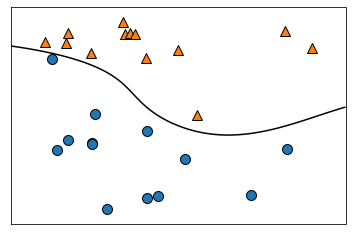

In [61]:
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.4).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

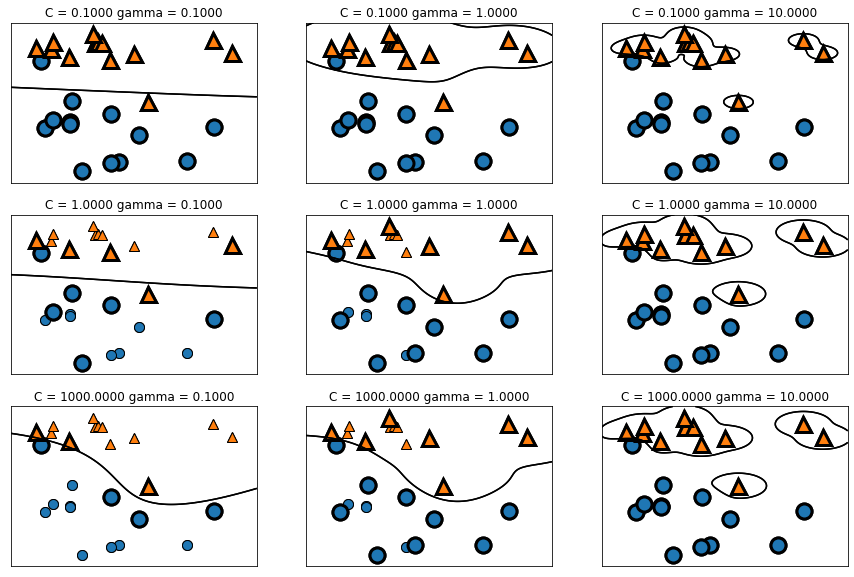

In [68]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(axes, [-1,1]): #C: 10^-1:0.1, 101^0 = 0.1 / 10^0: 1 ,10^43
        for ax_g, gamma in zip(ax, [-1, 0, 1]): #g=> 10^-1:0.1, 10^0:1, 10^1:10
            mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=ax_g)